In [1]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from heisenberg_hqa import run_heisenberg_hqa_from_datafile, datafile_to_dataframe, test_hqa
import seaborn as sns

/home/maiyuren/anaconda3/envs/quantum_computing/lib/python3.7/site-packages/qiskit/validation/fields/custom.py:76: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numpy.integer, numpy.float,


Taking 5 qubits
No such device.
Availability of gpu: False


### Load Data

In [2]:
# Loading data
data = datafile_to_dataframe("state_files/data_n_qubits-6.pkl")
data = data[data.depth==4]
distributions = np.array(data.statevector.to_list())
characteristics = np.array([[j]+ i for i, j in zip(data.Jlist.tolist(), data.depth.tolist())])

## Train model

In [12]:
model = run_heisenberg_hqa_from_datafile("data.pkl")

FileNotFoundError: [Errno 2] No such file or directory: 'data.pkl'

## Load model

In [3]:
filename = "pickled_models/hqa_model_ver_8.pickle"   # For 6 qubits
# filename = "pickled_models/hqa_model_ver_4.pickle" # For 8 qubits
with open(filename, "rb") as f:
    model = pickle.load(f)
model.reset_q_circs()

# Analysis

In [4]:
# Testing the HQA
test_results = test_hqa(model, 50, distributions)

100%|██████████| 50/50 [00:04<00:00, 10.74it/s]

Average Loss: 0.05716755146284358


In [7]:
# Creating the vectors
model.create_latent_vectors(distributions, characteristics)
model.pca_transform_latent_vectors(3, True)
model.dataframe_latent_points('heisenberg')
model.latent_landscape(0,1,2)

200it [00:04, 45.53it/s]


Variance explained by each principal component:
[99.62430099771741, 0.37246593041317155, 0.0032326335512548356, 4.2322225125947246e-07, 1.4631663029981585e-08, 4.6425229678857336e-10]



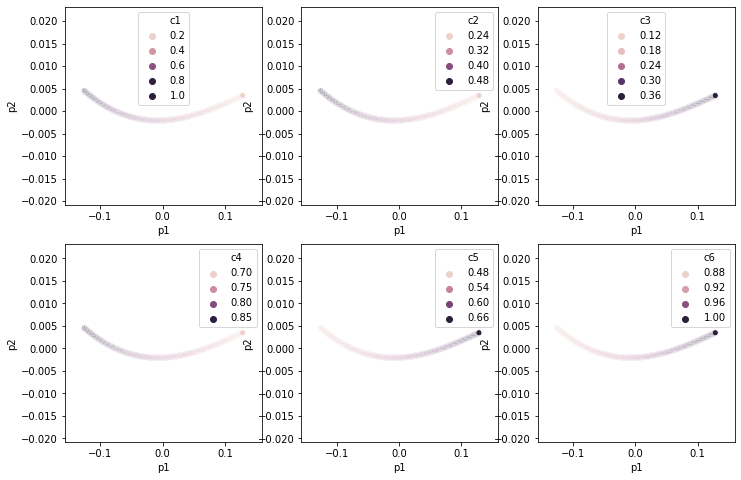

In [8]:
d = model.df_latent_vectors[model.df_latent_vectors.depth == 4.0]
fig, axs = plt.subplots(2,3, figsize=(12,8))
sns.scatterplot(x="p1", y="p2", hue='c1', data=d, ax=axs[0][0])
sns.scatterplot(x="p1", y="p2", hue='c2', data=d, ax=axs[0][1])
sns.scatterplot(x="p1", y="p2", hue='c3', data=d, ax=axs[0][2])
sns.scatterplot(x="p1", y="p2", hue='c4', data=d, ax=axs[1][0])
sns.scatterplot(x="p1", y="p2", hue='c5', data=d, ax=axs[1][1])
sns.scatterplot(x="p1", y="p2", hue='c6', data=d, ax=axs[1][2])

# Regression Analysis

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [162]:
X = model.latent_vectors
y = characteristics[:, 1]
X, X_test, y, y_test = train_test_split(X, y, test_size=0.5)

# Models
reg_lin = LinearRegression().fit(X, y)
reg_svm = svm.SVR().fit(X, y)
reg_ridge = Ridge(alpha=0.1).fit(X, y)

In [163]:
print("Linear reg score =", reg_lin.score(X_test, y_test))
print("SVM reg score    =", reg_svm.score(X_test, y_test))
print("Ridge reg score  =", reg_ridge.score(X_test, y_test))

Linear reg score = 0.5578200051376447
SVM reg score    = 0.521580259672324
Ridge reg score  = 0.562745292324905


In [164]:
print("actual, predictied")
yy = reg_lin.predict(X)
list(zip(y, yy))

actual, predictied


[(0.5623595958571446, 0.49801546182371603),
 (0.7896891717173742, 0.6465657730158627),
 (0.0961329153660545, 0.12475979101084289),
 (0.6578568835592381, 0.7333200313946151),
 (0.23523818111197892, 0.33677007791749736),
 (0.5078614032971787, 0.6132758602727846),
 (0.1579202482951534, 0.2105021825652439),
 (0.7554495787173637, 0.5730021541048411),
 (0.5669380959306892, 0.36004476278549213),
 (0.23226337576073464, 0.3560156334926703),
 (0.32062614689725544, 0.5662808644411426),
 (0.2616804816777185, 0.5837542974285299),
 (0.5708301344991504, 0.6278726623243003),
 (0.6214749208688178, 0.6605380035613442),
 (0.964833166614905, 0.6771295042930603),
 (0.8338307680574283, 0.6237455009074455),
 (0.8023256745326489, 0.8583098426447615),
 (0.19446018303289425, 0.3483227715098596),
 (0.5858414039726711, 0.49365406730444694),
 (0.6350241611777219, 0.6685760361370567),
 (0.5798621836450628, 0.8044032235318606),
 (0.039711974108326165, 0.05503895955835292),
 (0.3415123794189633, 0.20825007561928055),

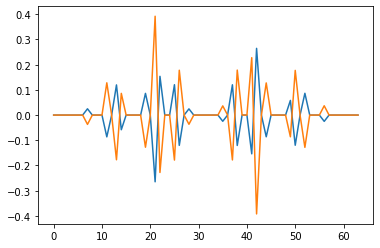

In [10]:
plt.plot(distributions[3].imag)
plt.plot(distributions[3].real)

## Traverse latent space

In [4]:
d = distributions

In [7]:
model.transition_states(d[4:6], 2, True)

[array([4.92269654e-05, 1.51085853e-03, 7.13367402e-03, 5.01021558e-05,
        6.54042512e-02, 9.79551693e-05, 1.38509729e-04, 4.94937670e-02,
        3.00722113e-02, 9.67657886e-05, 6.78498504e-05, 6.14257073e-02,
        4.57577748e-04, 2.42884598e-02, 3.14783284e-03, 2.19121467e-04,
        3.00720757e-03, 4.52597150e-04, 1.86665219e-04, 2.75544555e-02,
        3.62356284e-05, 6.25671328e-02, 3.03012422e-02, 1.26267862e-04,
        3.73334376e-05, 5.14237107e-02, 6.62827703e-02, 3.90083285e-05,
        8.73274130e-03, 1.72378885e-04, 3.92700484e-04, 1.63185971e-03,
        1.79692397e-03, 1.45890805e-04, 5.92131745e-04, 6.80130602e-03,
        7.17915058e-05, 6.49518885e-02, 4.85176649e-02, 1.68446716e-05,
        1.82960250e-04, 3.03791200e-02, 6.57186714e-02, 9.23982170e-06,
        2.72410986e-02, 5.70940259e-04, 1.25377387e-04, 3.69114170e-03,
        2.83889684e-05, 3.67334580e-03, 2.93157125e-02, 9.00290202e-05,
        6.49142227e-02, 2.22564299e-04, 1.17503077e-04, 3.051468